In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

### Load the integration data

In [12]:
data = np.load('data/double_pendulum_order_comparison_4_limit.npz')

In [13]:
q_list = data['q_list']
print('System coordinates are {}'.format(q_list))

System coordinates are ['theta_1' 'theta_2']


In [14]:
t_list = data['t_list']
q_solutions = data['q_solutions']
p_solutions = data['p_solutions']
l1, l2 = data['ls']

## Graph coordinate evolution

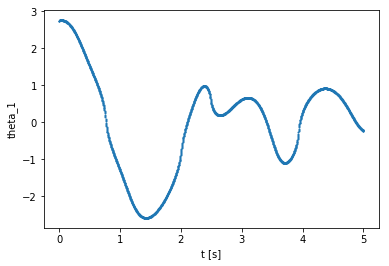

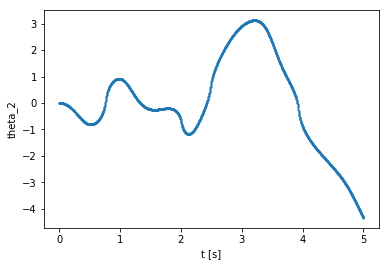

In [15]:
for i in range(0, 2):
    plt.figure()
    plt.plot(t_list, [q_solutions[j].take(i) for j in range(0, len(q_solutions))], '.', MarkerSize=2)
    plt.xlabel('t [s]')
    plt.ylabel(q_list[i])

## Compute x, y positions of pendulum arms

In [16]:
origin = (0, 0)

In [17]:
xs = []
ys = []

In [18]:
for index, element in enumerate(q_solutions):
    x = np.cumsum([origin[0],
                       l1 * np.sin(element.take(0)),
                       l2 * np.sin(element.take(1))])
    y = np.cumsum([origin[1],
                       -l1 * np.cos(element.take(0)),
                       -l2 * np.cos(element.take(1))])
    xs.append(x)
    ys.append(y)

In [ ]:
# set up figure and animation
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

def init():
    """initialize animation"""
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    """perform animation step"""
    line.set_data(xs[i], ys[i])
    time_text.set_text('t = %.1fs' % t_list[i])
    return line, time_text

dt = t_list[2] - t_list[1]
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)

ani = animation.FuncAnimation(fig, animate, frames=len(q_solutions),
                              interval=interval, blit=True, init_func=init)

# rc('animation', html='jshtml')
# rc

HTML(ani.to_jshtml())

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('double_pendulum.mp4', fps=30, extra_args=['-vcodec', 'libx264'])


In [ ]:
plt.figure()
plt.plot([xs[i][2] for i in range(0, len(xs))], [ys[i][2] for i in range(0, len(ys))], '.', MarkerSize=1)